In [5]:
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [7]:
import pandas as pd

# Load the CSV 
data = pd.read_csv('A:/10x/10X_Acadamy/Data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')


In [8]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
# Display summary statistics
print(data.describe())

         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


In [10]:
print(data.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [12]:
data.shape

(1407328, 6)

In [13]:
data['headline_length'] = data['headline'].apply(len)
print(data['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Date And Time Handling

In [14]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])  # Drop rows with invalid dates


In [15]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


## counting Article Publisher

In [16]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64


### Analyze Publication Date

In [17]:
# Convert date to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract publication year and month
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Count articles per month
monthly_counts = data.groupby(['year', 'month']).size()
print(monthly_counts)


year  month
2011  4           6
      5          78
      6          96
      7         137
      8         149
               ... 
2020  2        2356
      3        4680
      4        4616
      5        9333
      6        5990
Length: 111, dtype: int64


## Perform Sentimental Analysis

In [19]:
from textblob import TextBlob

def get_sentiment_score(headline):
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

data['sentiment_score'] = data['headline'].apply(get_sentiment_score)

In [20]:
# Display sentiment scores
print(data[['headline', 'sentiment_score']].head(10))

                                            headline  sentiment_score
0            Stocks That Hit 52-Week Highs On Friday             0.00
1         Stocks That Hit 52-Week Highs On Wednesday             0.00
2                      71 Biggest Movers From Friday             0.00
3       46 Stocks Moving In Friday's Mid-Day Session             0.00
4  B of A Securities Maintains Neutral on Agilent...             0.00
5  CFRA Maintains Hold on Agilent Technologies, L...             0.00
6  UBS Maintains Neutral on Agilent Technologies,...             0.00
7  Agilent Technologies shares are trading higher...             0.25
8  Wells Fargo Maintains Overweight on Agilent Te...             0.00
9         10 Biggest Price Target Changes For Friday             0.00


In [28]:

nltk.download('punkt_tab') 


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Performing Topic Modeling

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

stop_words = set(stopwords.words('english'))

def extract_keywords(headline):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(headline.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

data['keywords'] = data['headline'].apply(extract_keywords)

# Flatten list of keywords
all_keywords = [keyword for sublist in data['keywords'] for keyword in sublist]

# Count keyword frequencies
keyword_freq = Counter(all_keywords)
print(keyword_freq.most_common(10))


[('stocks', 12794), ('shares', 8374), ('trading', 6572), ('hit', 5898), ('eps', 5530), ('price', 5043), ('companies', 4778), ('target', 4676), ('several', 4650), ('sales', 4423)]


### Time Series Analysis

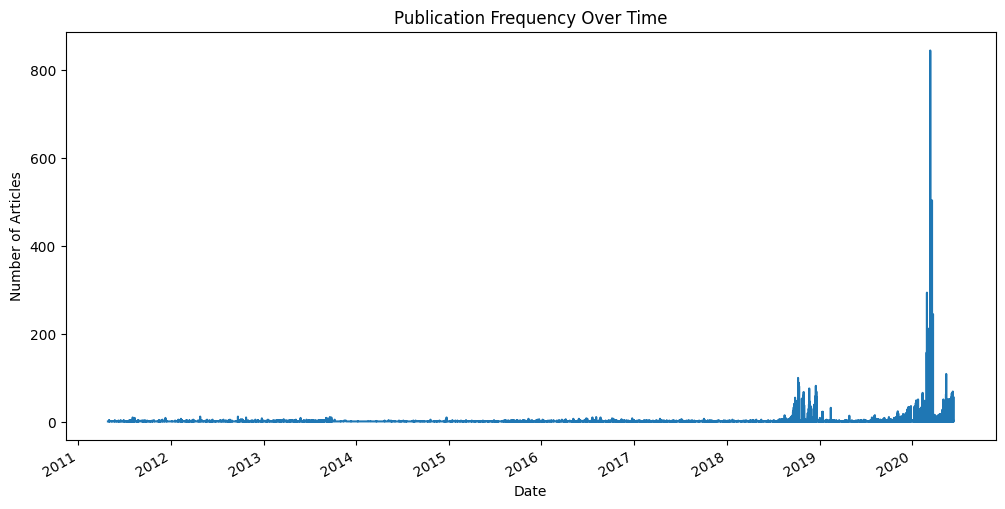

In [32]:
import matplotlib.pyplot as plt

# Count articles per day
daily_counts = data['date'].value_counts().sort_index()

# Plot publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


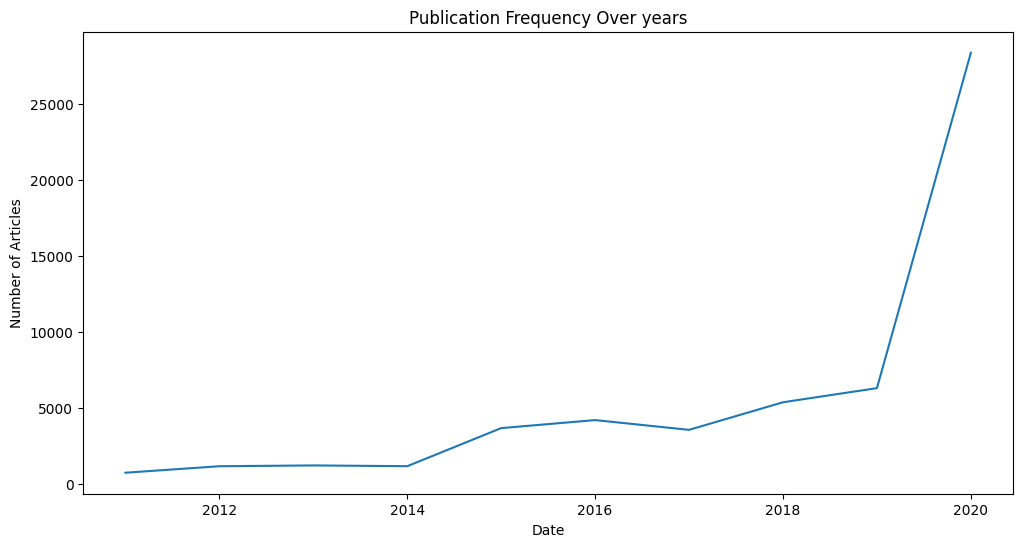

In [33]:
import matplotlib.pyplot as plt

# Count articles per day
daily_counts = data['year'].value_counts().sort_index()

# Plot publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Publication Frequency Over years')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


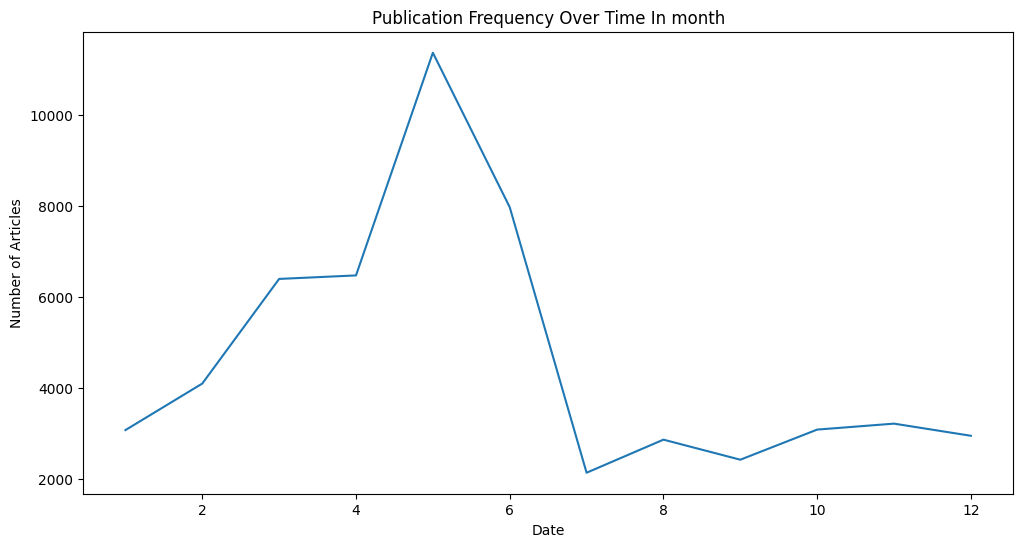

In [26]:
import matplotlib.pyplot as plt

# Count articles per day
daily_counts = data['month'].value_counts().sort_index()

# Plot publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Publication Frequency Over Time In month')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


### Analyze Publishing Times

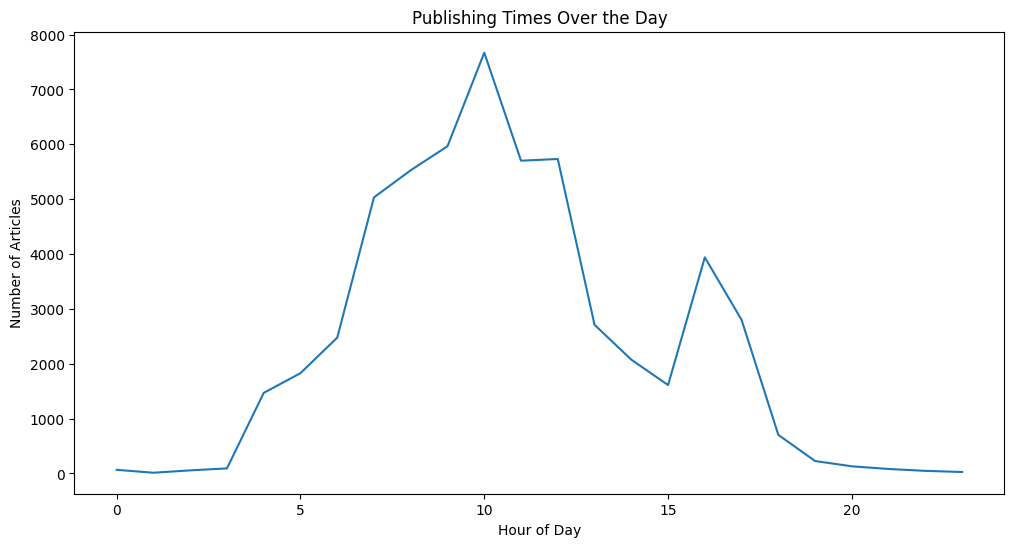

In [34]:
# Extract hour from the date
data['hour'] = data['date'].dt.hour

# Count articles per hour
hourly_counts = data['hour'].value_counts().sort_index()

# Plot publishing times
plt.figure(figsize=(12, 6))
hourly_counts.plot()
plt.title('Publishing Times Over the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()


## Analyizing Publisher

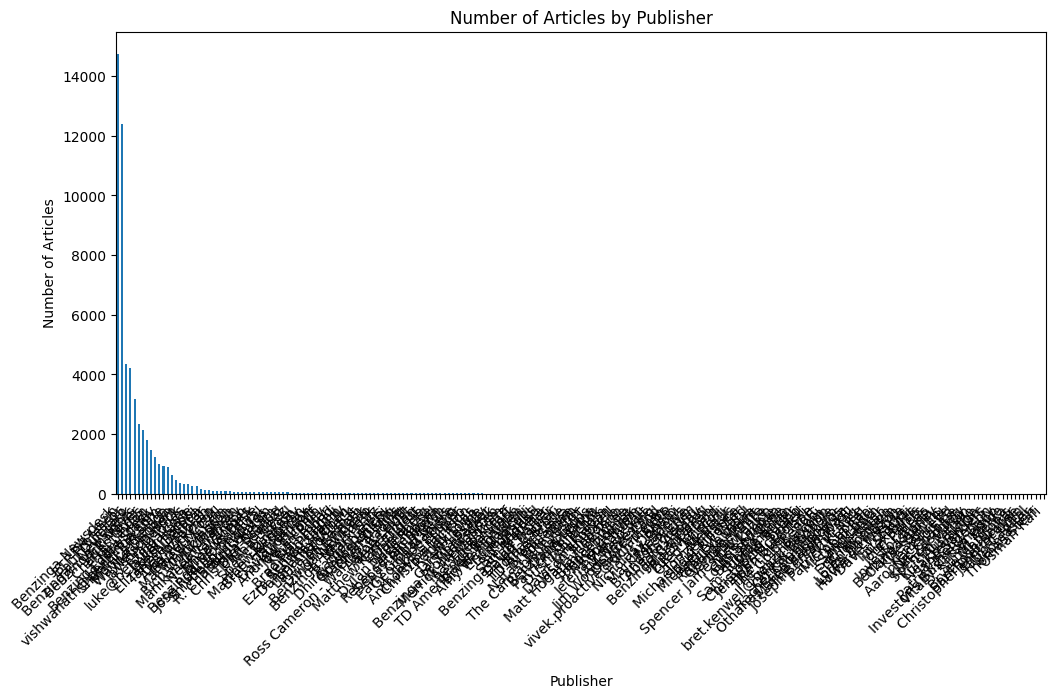

In [35]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()
plt.figure(figsize=(12, 6))
publisher_counts.plot(kind='bar')
plt.title('Number of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()


In [36]:
publisher_analysis = data.groupby('publisher').size().sort_values(ascending=False)
print(publisher_analysis)

publisher
Benzinga Newsdesk            14750
Lisa Levin                   12408
ETF Professor                 4362
Paul Quintaro                 4212
Benzinga Newsdesk             3177
                             ...  
VJ Yahoo                         1
Vitaliy Katsenelson              1
Zacks                            1
bret.kenwell@benzinga.com        1
webmaster                        1
Length: 225, dtype: int64


In [37]:
import re

def extract_domain(email):
    match = re.search('@([\w.]+)', email)
    return match.group(1) if match else 'Unknown'

# Extract domains
data['domain'] = data['publisher'].apply(extract_domain)

# Count articles per domain
domain_counts = data['domain'].value_counts()
print(domain_counts)

domain
Unknown         54788
benzinga.com     1196
gmail.com           3
Name: count, dtype: int64
